
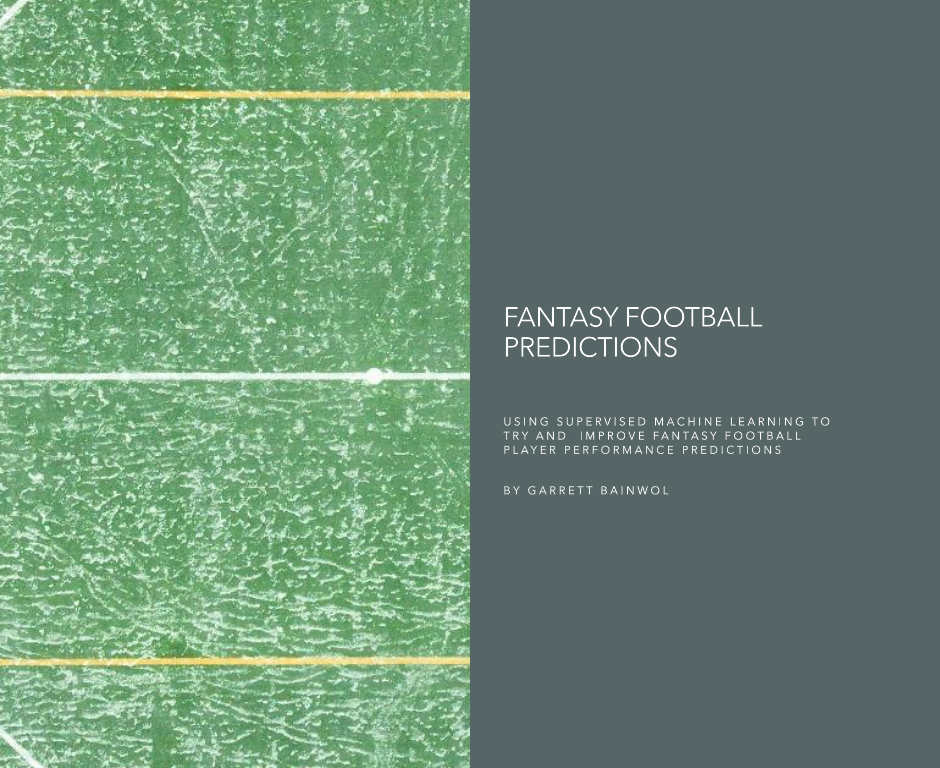

# Fantasy Football Predictions: Wide Receivers, Running Backs, and Tight Ends Supervised Prediction Model

**Garrett Bainwol**

## Introduction:
As an avid **Fantasy Football** enthusiast and a **data science student**, combining the two realms seems like a natural progression. The objective of this project is to predict weekly starts and sits for Wide Receivers, Running Backs, and Tight Ends using various metrics, with a primary focus on the concept of "weighted opportunity" as outlined in [this article](https://www.fantasypoints.com/nfl/articles/season/2023/weighted-opportunity-for-rbs#/).

## Problem Statement:
- **Type of Learning**: Supervised Machine Learning
- **Type of Task**: Regression (Predicting Fantasy Points)

## Goal:
**The primary goal is to outperform ESPN's weekly player projections by developing a more accurate prediction model. We aim to see if our model, which incorporates unique metrics like Weighted Opportunities Per Game and Snap Share, can provide superior predictions across three scoring formats: PPR, Half PPR, and TE Premium.**




**This can be seen as calculating a better Expected Fantasy Points Per Game.**



## Metrics of Interest:
- Weighted Opportunities Per Game
- Targets Per Game
- Rush+Receiving Yards Per Game
- Snap Share
- Offensive snaps per game
- Target share percentage 
- Points Per Touch
- Expected Turnovers(Fumbles) 


## ESPN Player Projection Metrics
- Base Points Per Game
- Utilization by Position
- Talent of the Defensive opponent
- Likeliness of Success against Opponent
- Length of Career(Age)
- Season Historical Factors
- History of Effectiveness
- Independent Projections from Experts


## Hypothesis
The central hypothesis is that "Weighted Opportunities" is a significant predictor of a player's success in Fantasy Football. By incorporating this metric, along with others, we aim to create a robust prediction model that can outperform traditional projections.

## Further Readings on Fantasy Points

1.  [Highly correlated fantasy stats for rbs](https://www.fantasypoints.com/nfl/articles/2023/fantasy-points-data-most-important-rb-stats#/)

2.  [Top 10 stats for fantasy](https://www.fantasypoints.com/nfl/articles/2023/fantasy-points-data-top-10-stats#/)

3.  [Highly correlated fantasy stats for wrs](https://www.fantasypoints.com/nfl/articles/2023/fantasy-points-data-most-important-wr-stats#/)

4.  [Wins above replacement](https://www.fantasypoints.com/nfl/articles/2023/finding-fantasy-values-using-war#/)


 ## further briefing on project
Given the specificity of the metrics, a custom dataset was  curated, pulling data from various sources and ensuring all relevant metrics are captured. we still need to calculate the weighted opportunitity while doing some final data formatting and EDA.

note:

[how Weighted Opportunity is traditionally calculated for wide receivers](https://www.nbcsports.com/fantasy/football/news/article-numbers-why-receiver-air-yards-matter) 

We will be using a different metric still involving target share but not involving air yards at all.


From the weighted opportunity link: **WOPR**

WOPR stands for Weighted Opportunity Rating. It takes a player's target share and share of team Air Yards and combines them in a way that best predicts both PPR and standard fantasy points. The formula for WOPR is:

1.5 \* Target Share + 0.7 \* Share of Team Air Yards

This opportunity rating combined with a player's PPR points can help us spot players who under-produced their volume. In other words, WOPR helps us spot buy-lows both in-season and between seasons.

We will be using the metric from the first link in this notebook combined with other metrics to predict fantasy production weighted for the different formats.

## Dataset Creation:
In the [first notebook](https://github.com/gbainwol/Supervised-Learning-Final-Project-DTSA-5509-/blob/main/SupervisedLearningFinalProjectpart1.ipynb) We used the nflreader package in R to load in the data for players for the regular season going back to the 2020 season. We only go back to 2020 because we are not predicting QB score and other offensive players tend to have shorter careers.We cleaned the data and created various csv files for future use.   We cleaned up unneccessary rows based on player position. We filled in missing values where there was missing values in the datasets we created. The datasets we created will enable us to do further analysis and prediction. We filtered for active players and created separate and unique datasets. We would like to see how different supervised methods perform in predicting player performance. We removed duplicate columns and merged certain datasets for team offensive and defensive statistics. 

## Scoring by Format for Fantasy Football

### PPR (Point Per Reception)

| **Action**                | **Points** |
|---------------------------|------------|
| **PPR (Point Per Reception)** |            |
| Rushing Yard              | 0.1        |
| Rushing Touchdown         | 6          |
| Reception (RBs & WRs)     | 1          |
| Reception (TEs)           | 1          |
| Receiving Yard            | 0.1        |
| Receiving Touchdown       | 6          |

### Half PPR

| **Action**                | **Points** |
|---------------------------|------------|
| **Half PPR**              |            |
| Rushing Yard              | 0.1        |
| Rushing Touchdown         | 6          |
| Reception (RBs & WRs)     | 0.5        |
| Reception (TEs)           | 0.5        |
| Receiving Yard            | 0.1        |
| Receiving Touchdown       | 6          |

### TE Premium

| **Action**                | **Points** |
|---------------------------|------------|
| **TE Premium**            |            |
| Rushing Yard              | 0.1        |
| Rushing Touchdown         | 6          |
| Reception (RBs & WRs)     | 1          |
| Reception (TEs)           | 1.5        |
| Receiving Yard            | 0.1        |
| Receiving Touchdown       | 6          |










 
## Notable quote from link regarding the calculation of weighted opportunity:
**On average (over the past five seasons), a single rushing attempt has been worth about 0.62 fantasy points. A target has been worth roughly 1.57 fantasy points in PPR leagues. So, broadly speaking, a target is worth 2.53 times as much as a carry in PPR leagues. In half-point PRR leagues, targets are 1.90 times as valuable.**
 
 **weighing the value of a TE reception in TE Premium would be 2.07 assuming it is PPR for Running Backs and Wide Receivers.**
 
 | Scoring Format | Rushing Attempt Value | Target Value (RBs & WRs) | Target Value (TEs) | Target to Rushing Attempt Ratio (RBs & WRs) |
|----------------|-----------------------|--------------------------|--------------------|---------------------------------------------|
| PPR            | 0.62                  | 1.57                     | 1.57               | 2.53                                        |
| Half PPR       | 0.62                  | 1.18                     | 1.18               | 1.90                                        |
| TE Premium     | 0.62                  | 1.57                     | 2.07               | 2.53                                        |







# EXPLORATORY DATA ANALYSIS



In my first notebook I created many CSVs for different stages of the datasets.I pulled QB statistics because Quarterback performance could be used to predict player score. Lets first load in and examine our datasets 

In [1]:
import pandas as pd 
file_path = "C:/Users/Garrett Bainwol/Desktop/UC Boulder/Supervised Learning/Final Project Csvs/"

#Loading in the CSVs created from our first notebook

PS = pd.read_csv(file_path + "PS.csv")#unfiltered for active players for all positions dataframe going back to 2020

arb = pd.read_csv(file_path + "arb.csv")#active running backs data frame 


ate = pd.read_csv(file_path + "ate.csv")#active tight end data frame

awr = pd.read_csv(file_path + "awr.csv")#active wide receiver dataframe



#dataset that includes retired players 
qb = pd.read_csv(file_path + "qb.csv")
te = pd.read_csv(file_path + "te.csv")
rb = pd.read_csv(file_path + "rb.csv")
wr = pd.read_csv(file_path + "wr.csv")


#datasets for team offensive defensive statistics by year(not weekly data)
offensive_stats_20 = pd.read_csv(file_path + "offensive_stats_20.csv")
offensive_stats_21 = pd.read_csv(file_path + "offensive_stats_21.csv")
offensive_stats_22 = pd.read_csv(file_path + "offensive_stats_22.csv")
offensive_stats_23 = pd.read_csv(file_path + "offensive_stats_23.csv")
defensive_stats_20 = pd.read_csv(file_path + "defensive_stats_20.csv")
defensive_stats_21 = pd.read_csv(file_path + "defensive_stats_21.csv")
defensive_stats_22 = pd.read_csv(file_path + "defensive_stats_22.csv")
defensive_stats_23 = pd.read_csv(file_path + "defensive_stats_23.csv")



offensive_stats_22



,Team,Pass Att,Cmp,Cmp %,Yds/Att,Pass Yds,Pass TD,INT,Rate,1st,...,40+ Yd Rush,Rush Lng,Rush 1st,Rush 1st%,Rush FUM,3rd Att,3rd Md,4th Att,4th Md,Scrm Plys
0,ARI,664,433,65.2,6.0,3966,17,17,79.2,189,...,2,45,115,26.5,11,233,82,41,18,1144
1,ATL,415,257,61.9,7.0,2927,17,9,87.7,148,...,4,44,152,27.2,8,196,82,18,9,1011
2,BAL,488,300,61.5,6.6,3202,19,13,82.5,149,...,3,79T,167,31.8,9,218,91,20,8,1052
3,BUF,574,361,62.9,7.5,4291,35,14,95.8,212,...,2,44T,128,29.8,12,193,97,13,7,1037
4,CAR,457,267,58.4,7.1,3246,16,13,80.2,138,...,3,60T,119,24.6,10,202,64,21,12,976
5,CHI,377,223,59.2,6.9,2598,19,15,80.3,109,...,8,67,148,26.5,10,220,90,25,8,993
6,CIN,610,418,68.5,7.4,4520,35,12,101.0,221,...,1,40,96,24.1,0,206,95,12,3,1053
7,CLE,540,335,62.0,6.9,3710,19,12,84.9,182,...,1,41,142,26.7,4,231,88,42,23,1116
8,DAL,556,355,63.8,7.0,3911,28,18,87.9,194,...,3,57,129,24.3,2,231,105,19,10,1114
9,DEN,571,345,60.4,7.0,4007,18,15,81.2,166,...,1,52,105,23.6,10,230,67,24,12,1078


In [2]:
defensive_stats_22
defensive_stats_22.columns

Index(['Team', '3rd Att', '3rd Md', '4th Att', '4th Md', 'Rush 1st',
       'Rush 1st%', 'Scrm Plys', 'Pass Att', 'Cmp', 'Cmp %', 'Yds/Att',
       'Pass Yds', 'Pass TD Allowed', 'INT', '1st', '1st%', 'Sck', 'Rush Att',
       'Rush Yds', 'YPC', 'Rush TD Allowed'],
      dtype='object')



YPC

notice how some of the rankings for the rushing and passing have half values. that means the teams have the same average for the stat we want a dense ranking 


### we know thanks to the guys at fantasy points that weighted opportunity correlates very well to fantasy score. I want to understand a few things so lets calculate a Weighted Opportunity for all of our active Running Backs, Wide Receivers, and Tight Ends. We will also produce an average for the offensive and defensive team statistics so we can produce a ranking/rating. 

In [3]:
def compute_fantasy_points(df, df_name, scoring_format):
    # Determine position based on dataframe name
    position = 'TE' if 'te' in df_name.lower() else 'RB' if 'rb' in df_name.lower() else 'WR'
    
    # Compute games_played for each player
    df['games_played'] = df.groupby('player_name')['player_name'].transform('count')
    
    # Define scoring multipliers
    reception_multiplier = 1.0  # Default for PPR
    half_ppr_multiplier = 0.5   # Default for Half PPR
    
    # PPR Fantasy Points
    df['PPR_FP'] = (df['rushing_yards'] * 0.1) + (df['rushing_tds'] * 6) + \
                   (df['receptions'] * reception_multiplier) + (df['receiving_yards'] * 0.1) + \
                   (df['receiving_tds'] * 6)
    
    # Half PPR Fantasy Points
    df['Half_PPR_FP'] = (df['rushing_yards'] * 0.1) + (df['rushing_tds'] * 6) + \
                       (df['receptions'] * half_ppr_multiplier) + (df['receiving_yards'] * 0.1) + \
                       (df['receiving_tds'] * 6)
    
    # TE Premium Fantasy Points
    te_premium_multiplier = 1.5 if position == 'TE' else 1.0  
    df['TE_Premium_FP'] = (df['rushing_yards'] * 0.1) + (df['rushing_tds'] * 6) + \
                         (df['receptions'] * te_premium_multiplier) + (df['receiving_yards'] * 0.1) + \
                         (df['receiving_tds'] * 6)
    
    # Weighted Opportunity
    if position == 'TE' and scoring_format == 'TE_Premium':
        target_value = 2.07
    else:
        target_value = 1.57
    
    df['Weighted_Opportunity'] = (df['carries'] * 0.62) + (df['targets'] * target_value)
    
    return df

awr = compute_fantasy_points(awr, 'awr', 'PPR')  # or 'Half_PPR' or 'TE_Premium' depending on your need
arb = compute_fantasy_points(arb, 'arb', 'PPR')  # or 'Half_PPR' or 'TE_Premium' depending on your need
ate = compute_fantasy_points(ate, 'ate', 'TE_Premium')  # Assuming you want TE_Premium for TEs



In [4]:
arb

,week,team,player_name,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,...,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,opponent_team,games_played,PPR_FP,Half_PPR_FP,TE_Premium_FP,Weighted_Opportunity
0,1,ARI,Chase Edmonds,2020,0,0,0,0,0,0,...,0.209994,0,10.5,13.5,SF,43,13.5,12.0,13.5,11.57
1,1,BAL,Gus Edwards,2020,0,0,0,0,0,0,...,NaN,0,1.7,1.7,CLE,27,1.7,1.7,1.7,2.48
2,1,BUF,Zack Moss,2020,0,0,0,0,0,0,...,0.156326,0,8.7,11.7,NYJ,40,11.7,10.2,11.7,11.86
3,1,BUF,Devin Singletary,2020,0,0,0,0,0,0,...,0.269100,0,5.3,10.3,NYJ,51,10.3,7.8,10.3,16.57
4,1,CAR,Christian McCaffrey,2020,0,0,0,0,0,0,...,0.186506,0,25.5,28.5,LV,29,28.5,27.0,28.5,20.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2,TB,Sean Tucker,2023,0,0,0,0,0,0,...,NaN,0,0.7,0.7,CHI,2,0.7,0.7,0.7,4.96
2752,2,TEN,Tyjae Spears,2023,0,0,0,0,0,0,...,0.138270,0,5.5,7.5,LAC,2,7.5,6.5,7.5,8.10
2753,2,TEN,Derrick Henry,2023,0,0,0,0,0,0,...,0.203555,0,15.5,18.5,LAC,42,18.5,17.0,18.5,21.78
2754,2,WAS,Brian Robinson,2023,0,0,0,0,0,0,...,0.059792,0,26.9,28.9,DEN,14,26.9,25.9,26.9,15.87


If you compare the Weighted_Opportunity Column to the FP columns most of the time the value for weighted_opportunity is very close to actual points scoredif you check the 

In [5]:
arb.columns

Index(['week', 'team', 'player_name', 'season', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'opponent_team', 'games_played', 'PPR_FP', 'Half_PPR_FP',
       'TE_Premium_FP', 'Weighted_Opportunity

In [6]:
ate

,week,team,player_name,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,...,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,opponent_team,games_played,PPR_FP,Half_PPR_FP,TE_Premium_FP,Weighted_Opportunity
0,1,BAL,Mark Andrews,2020,0,0,0,0,0,0,...,0.532941,0,17.8,22.8,CLE,47,22.8,20.3,25.3,12.42
1,1,BUF,Dawson Knox,2020,0,0,0,0,0,0,...,0.145985,0,2.6,4.6,NYJ,43,4.6,3.6,5.6,6.21
2,1,CAR,Ian Thomas,2020,0,0,0,0,0,0,...,0.118343,0,1.6,3.6,LV,40,3.6,2.6,4.6,4.14
3,1,CAR,Chris Manhertz,2020,0,0,0,0,0,0,...,0.036591,0,0.4,1.4,LV,21,1.4,0.9,1.9,2.07
4,1,CHI,Jimmy Graham,2020,0,0,0,0,0,0,...,0.365879,0,8.5,11.5,DET,27,11.5,10.0,13.0,14.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,2,TEN,Trevon Wesco,2023,0,0,0,0,0,0,...,0.075770,0,0.0,0.0,LAC,11,0.0,0.0,0.0,2.07
2251,2,TEN,Chigoziem Okonkwo,2023,0,0,0,0,0,0,...,0.303081,0,3.5,7.5,LAC,17,7.5,5.5,9.5,8.28
2252,2,WAS,Cole Turner,2023,0,0,0,0,0,0,...,0.088235,0,2.1,4.1,DEN,7,4.1,3.1,5.1,4.14
2253,2,WAS,John Bates,2023,0,0,0,0,0,0,...,0.369978,0,4.6,7.6,DEN,21,7.6,6.1,9.1,10.35


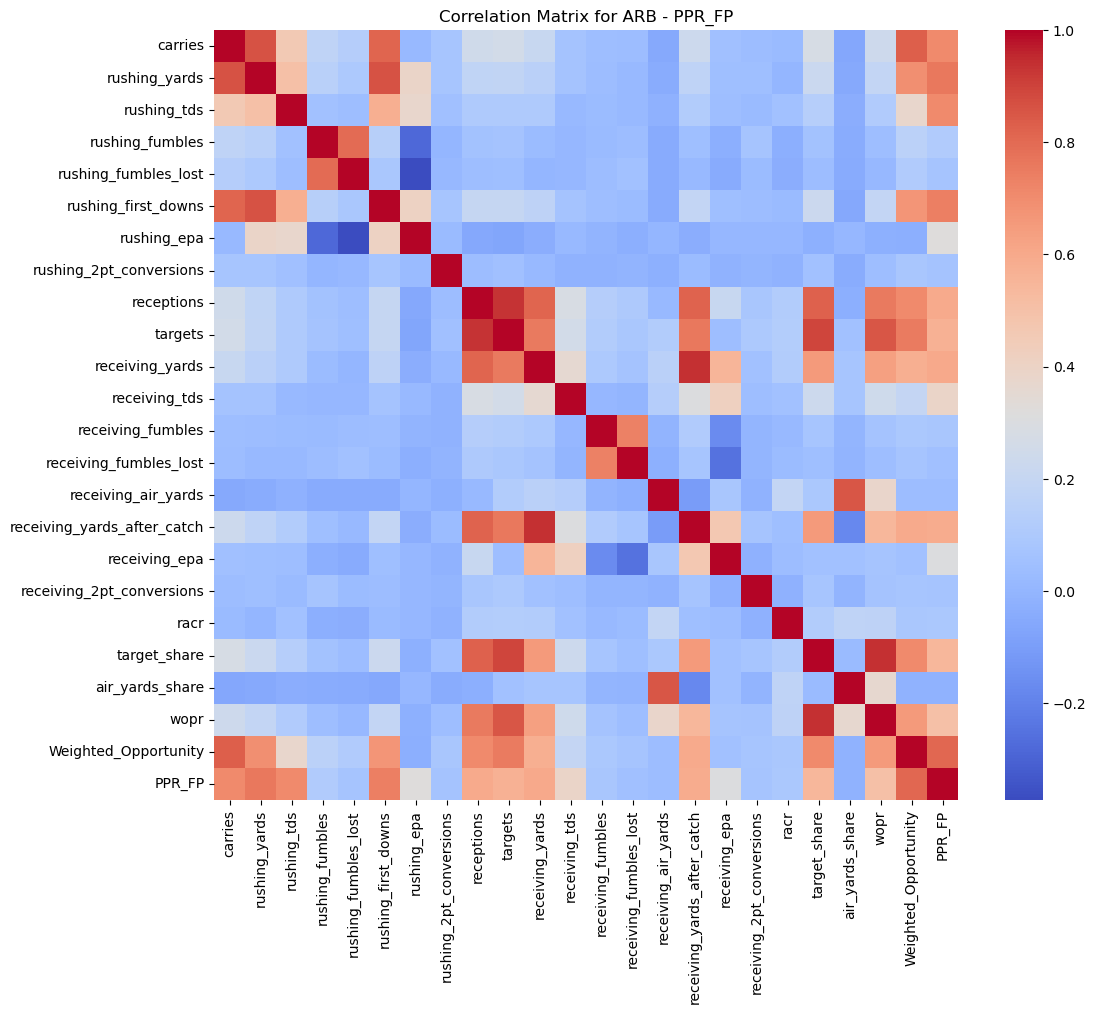

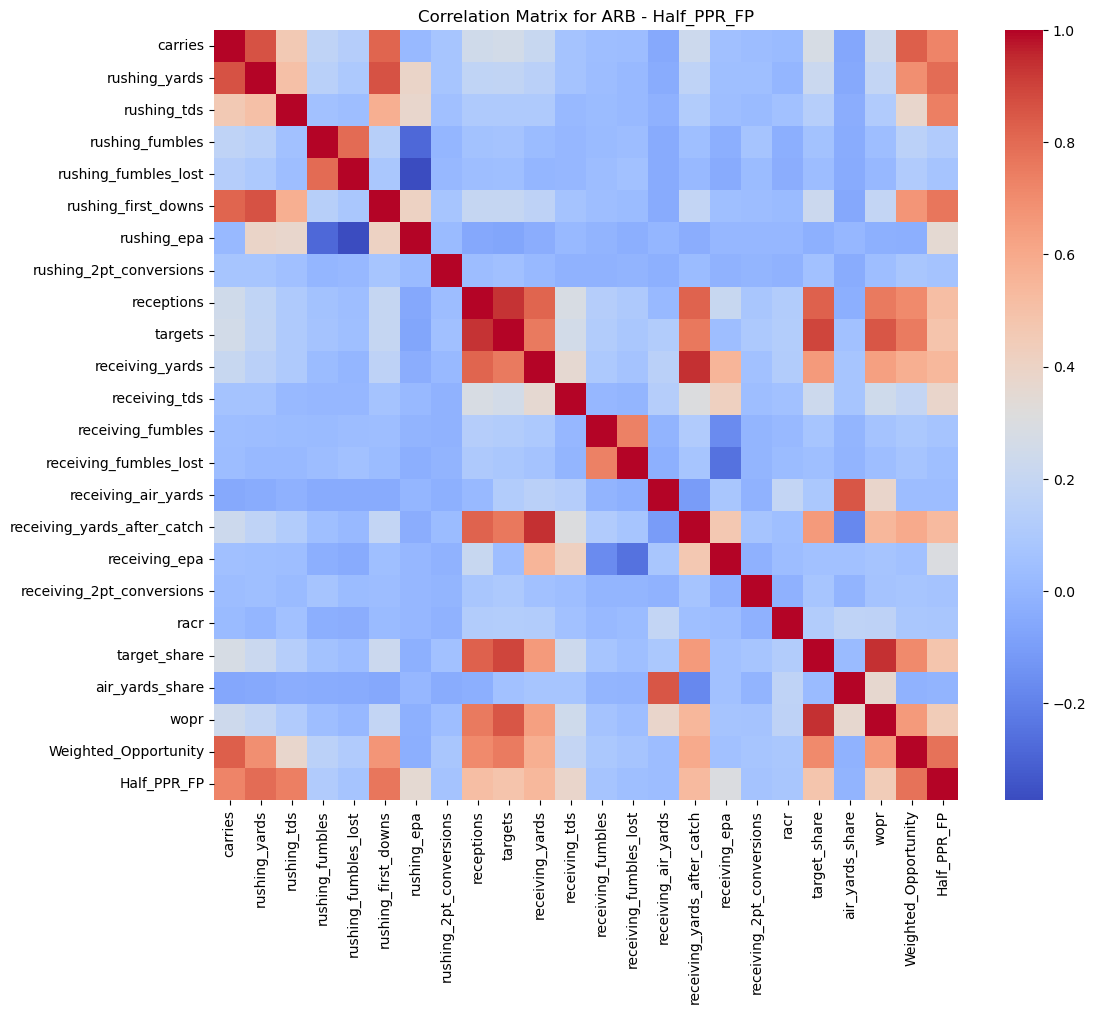

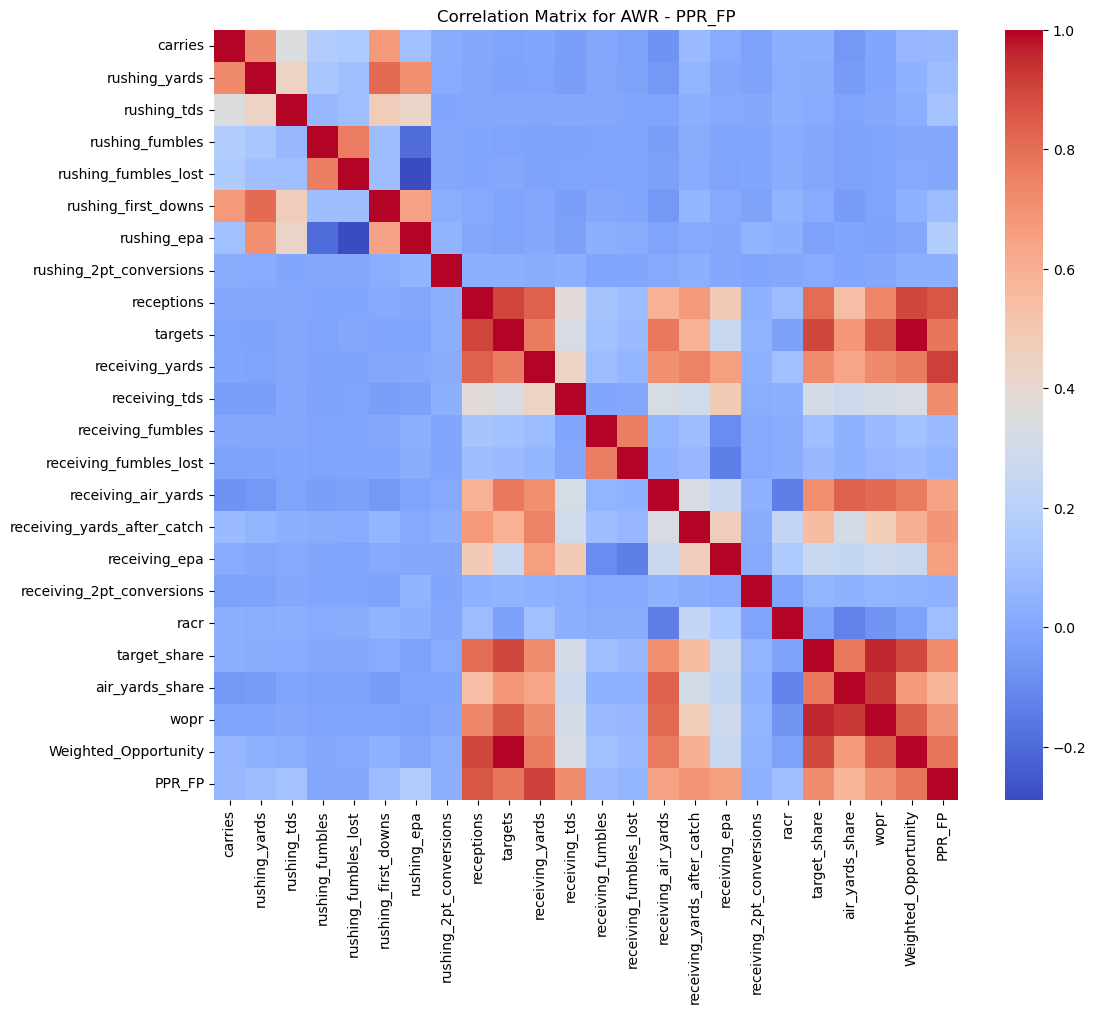

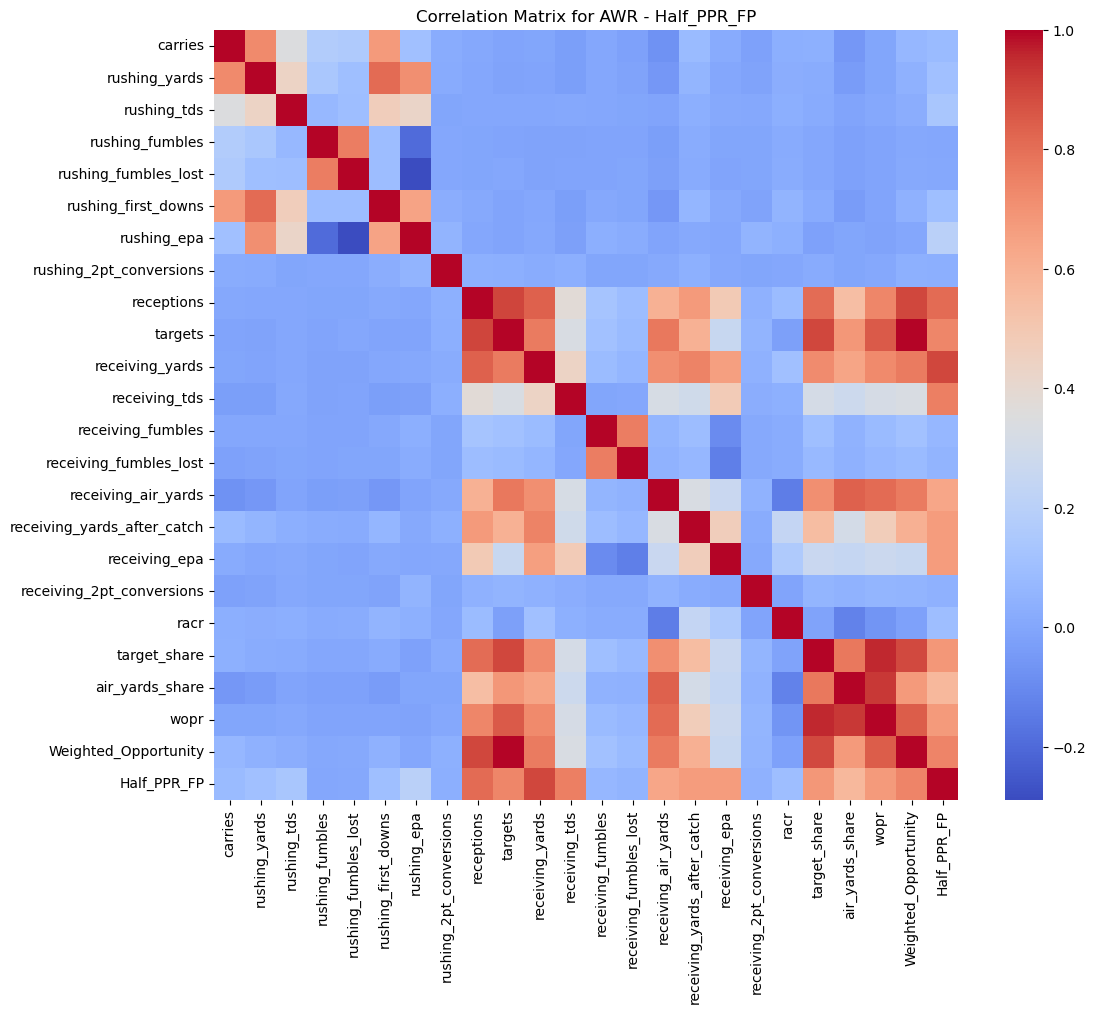

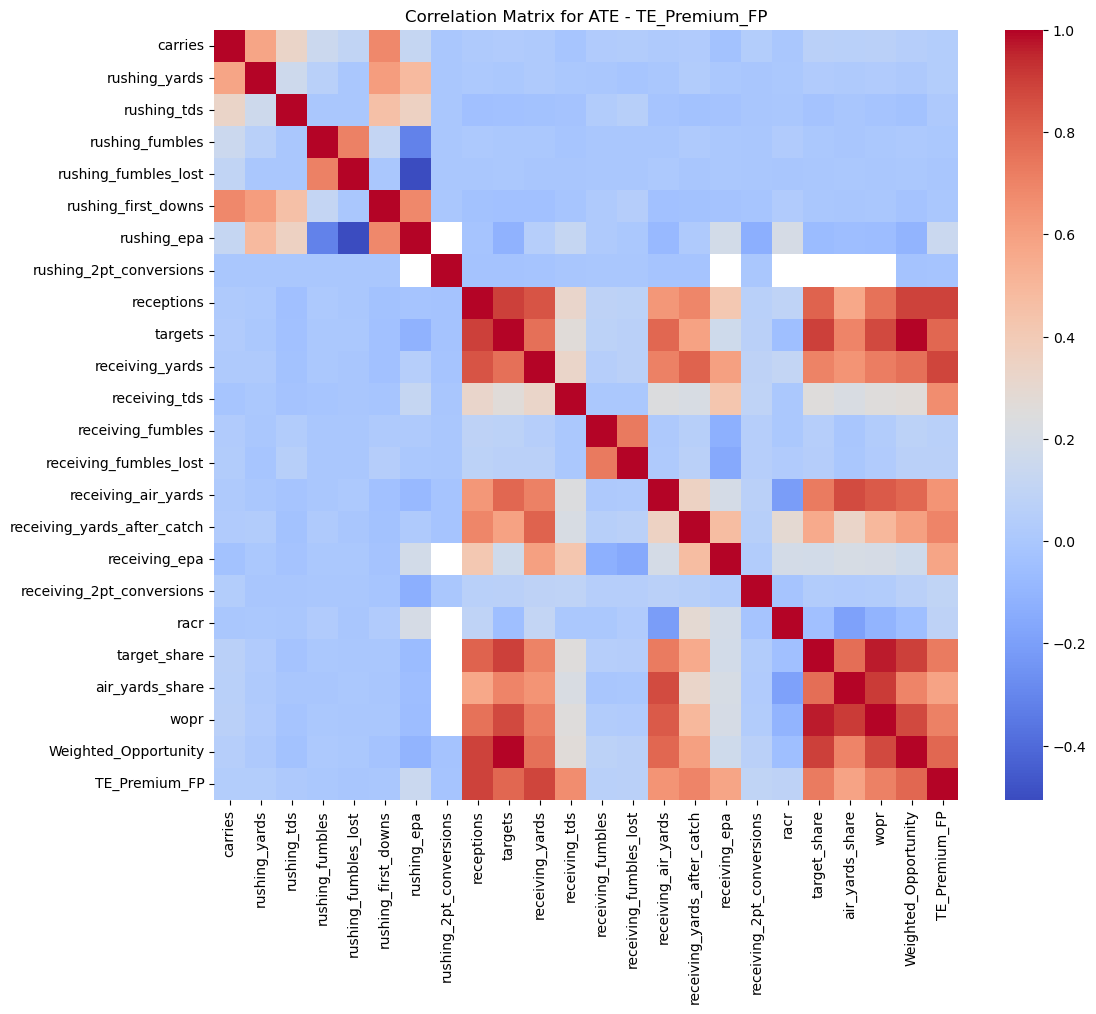

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 
            'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 
            'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 
            'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 
            'receiving_air_yards', 'receiving_yards_after_catch', 
            'receiving_epa', 'receiving_2pt_conversions', 'racr', 'target_share', 
   
            'air_yards_share', 'wopr', 'Weighted_Opportunity']  # Removed 'opponent_team'
fantasy_points = {
  'ARB': ['PPR_FP', 'Half_PPR_FP'],
  'AWR': ['PPR_FP', 'Half_PPR_FP'],
  'ATE': ['TE_Premium_FP']
}

for name, df in zip(['ARB', 'AWR', 'ATE'], [arb, awr, ate]):

  for fp in fantasy_points[name]:
   
    corr_matrix = df[features + [fp]].corr()
  
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=False, fmt=".1f", cmap='coolwarm')
    plt.title(f"Correlation Matrix for {name} - {fp}")
    plt.show()

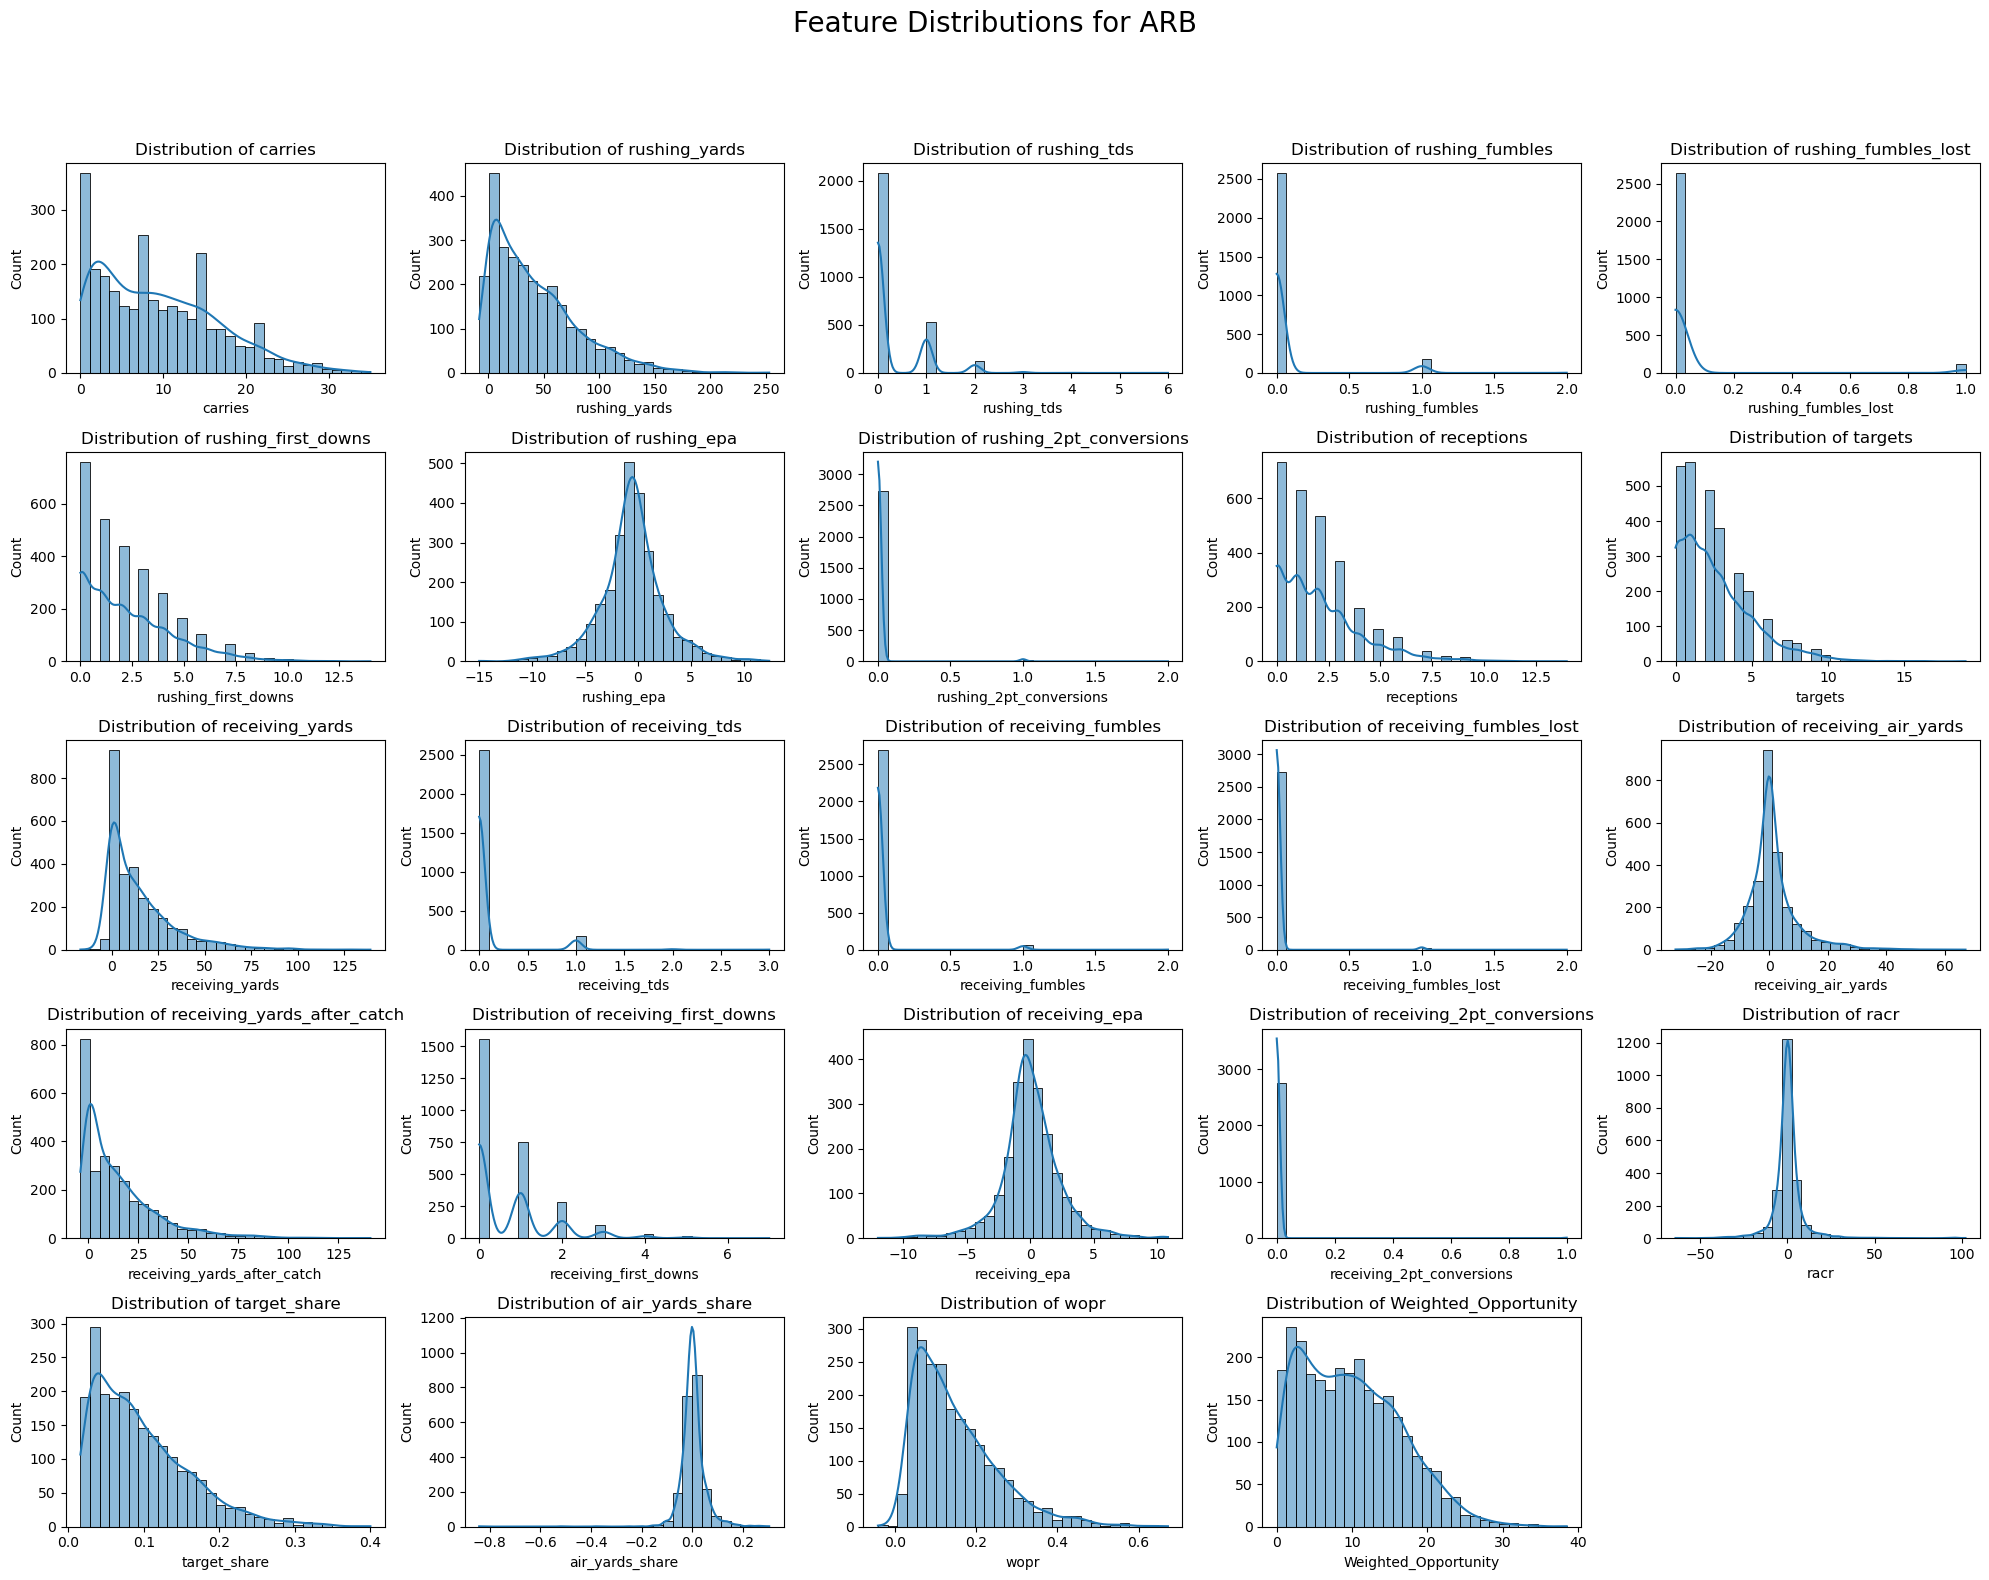

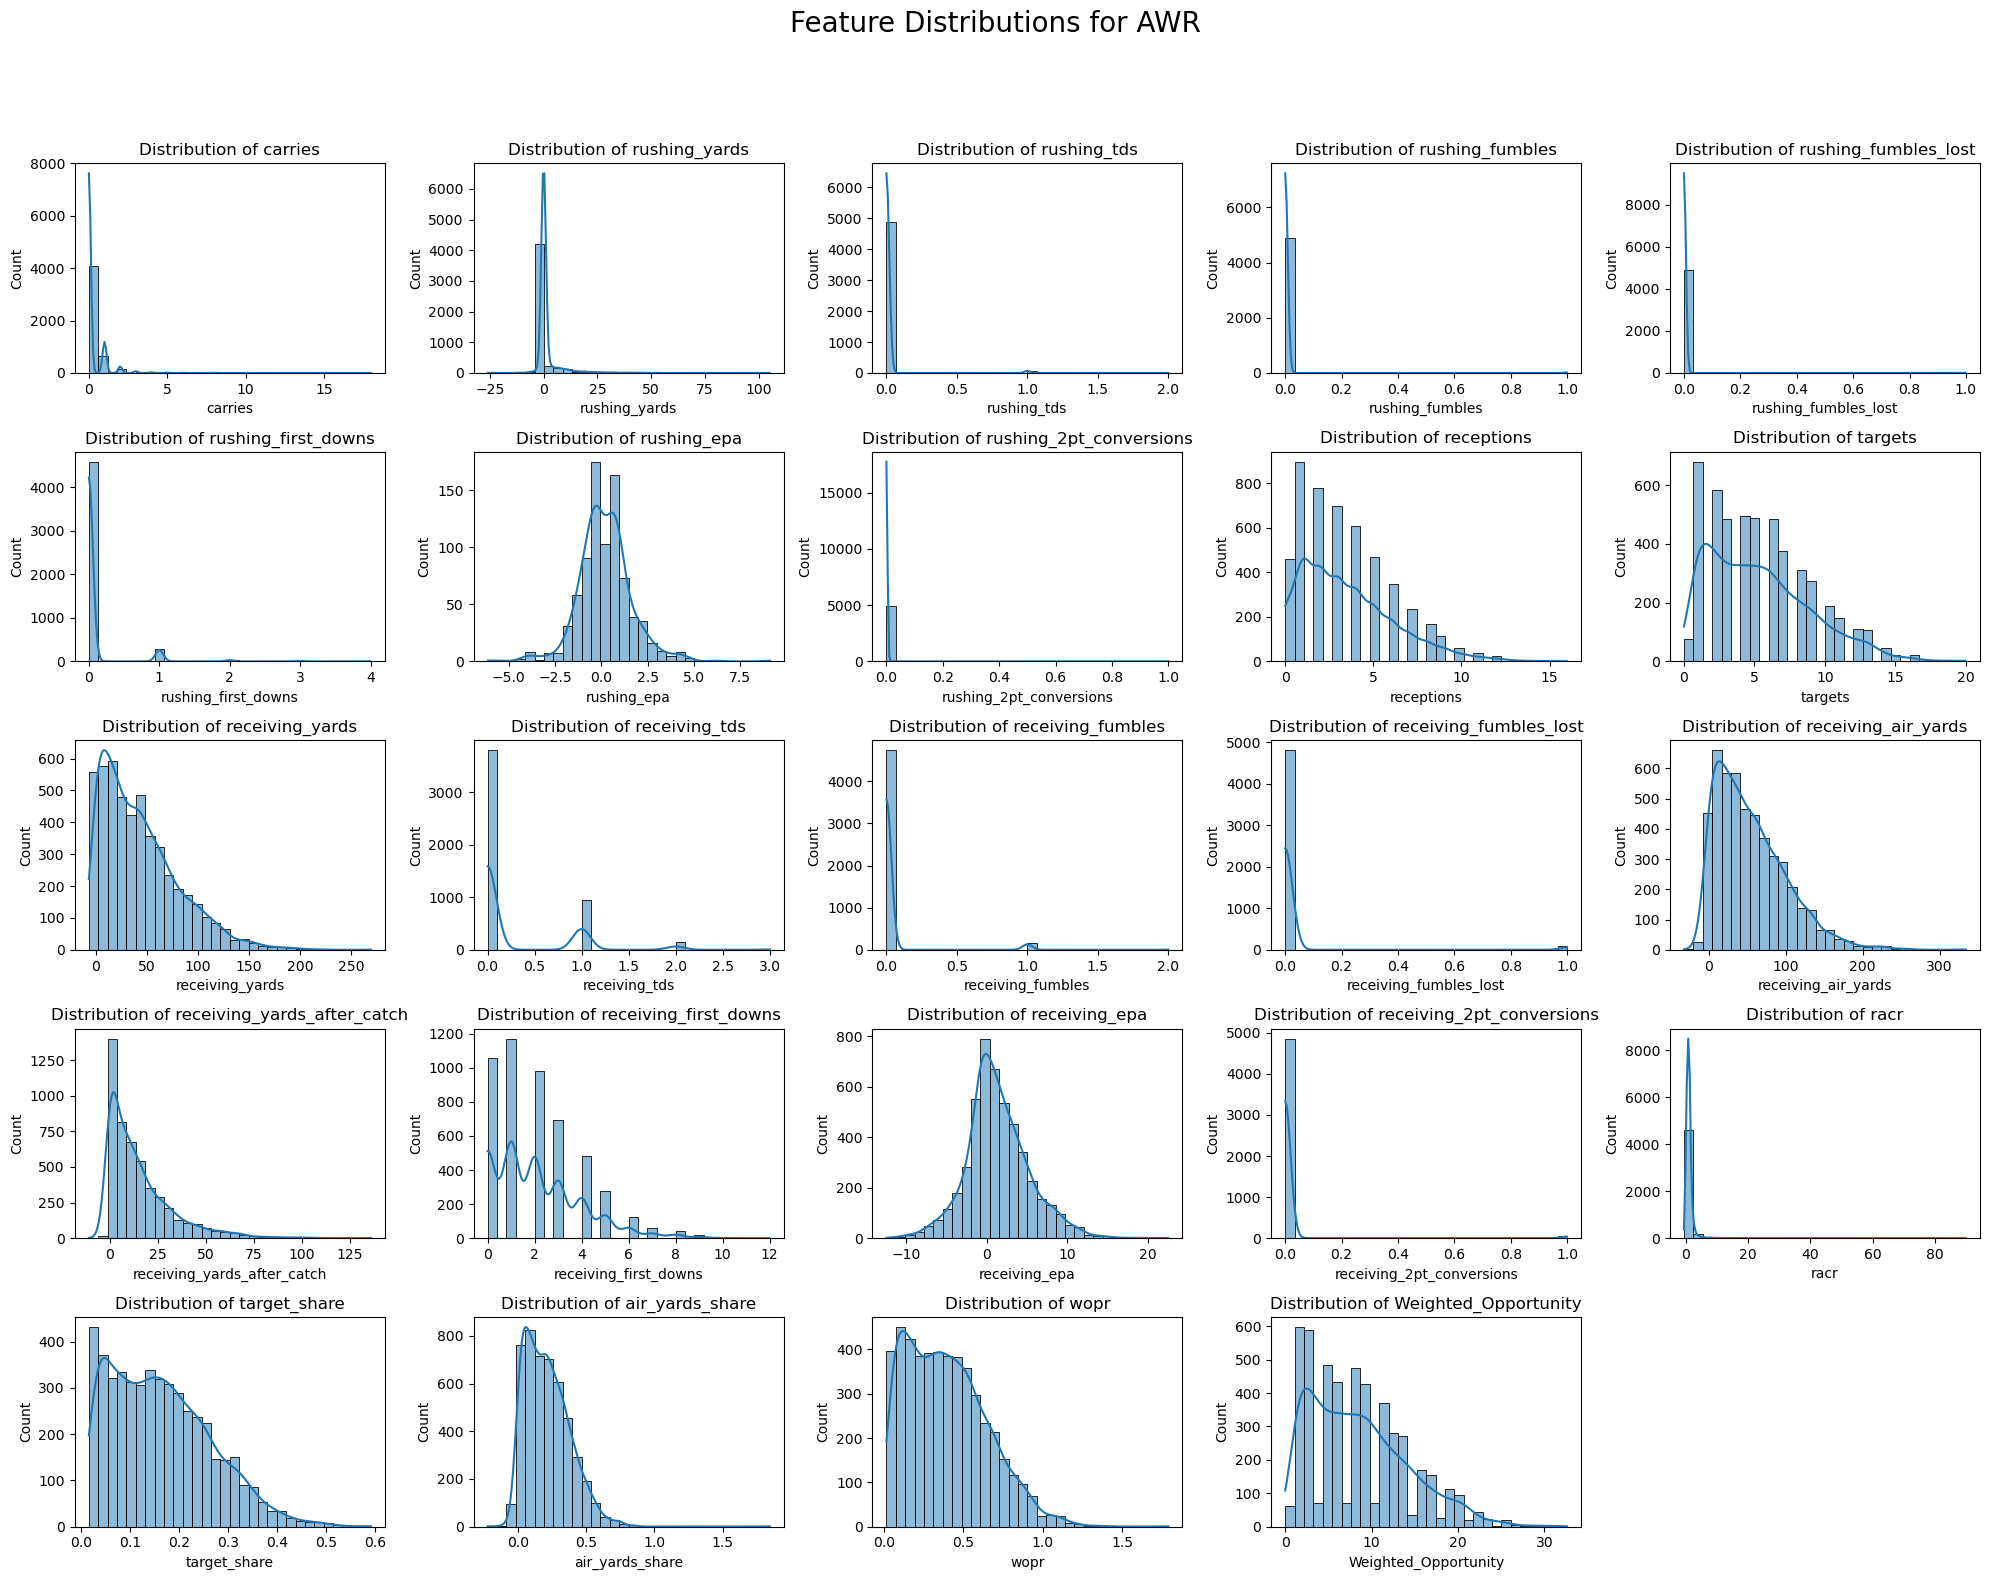

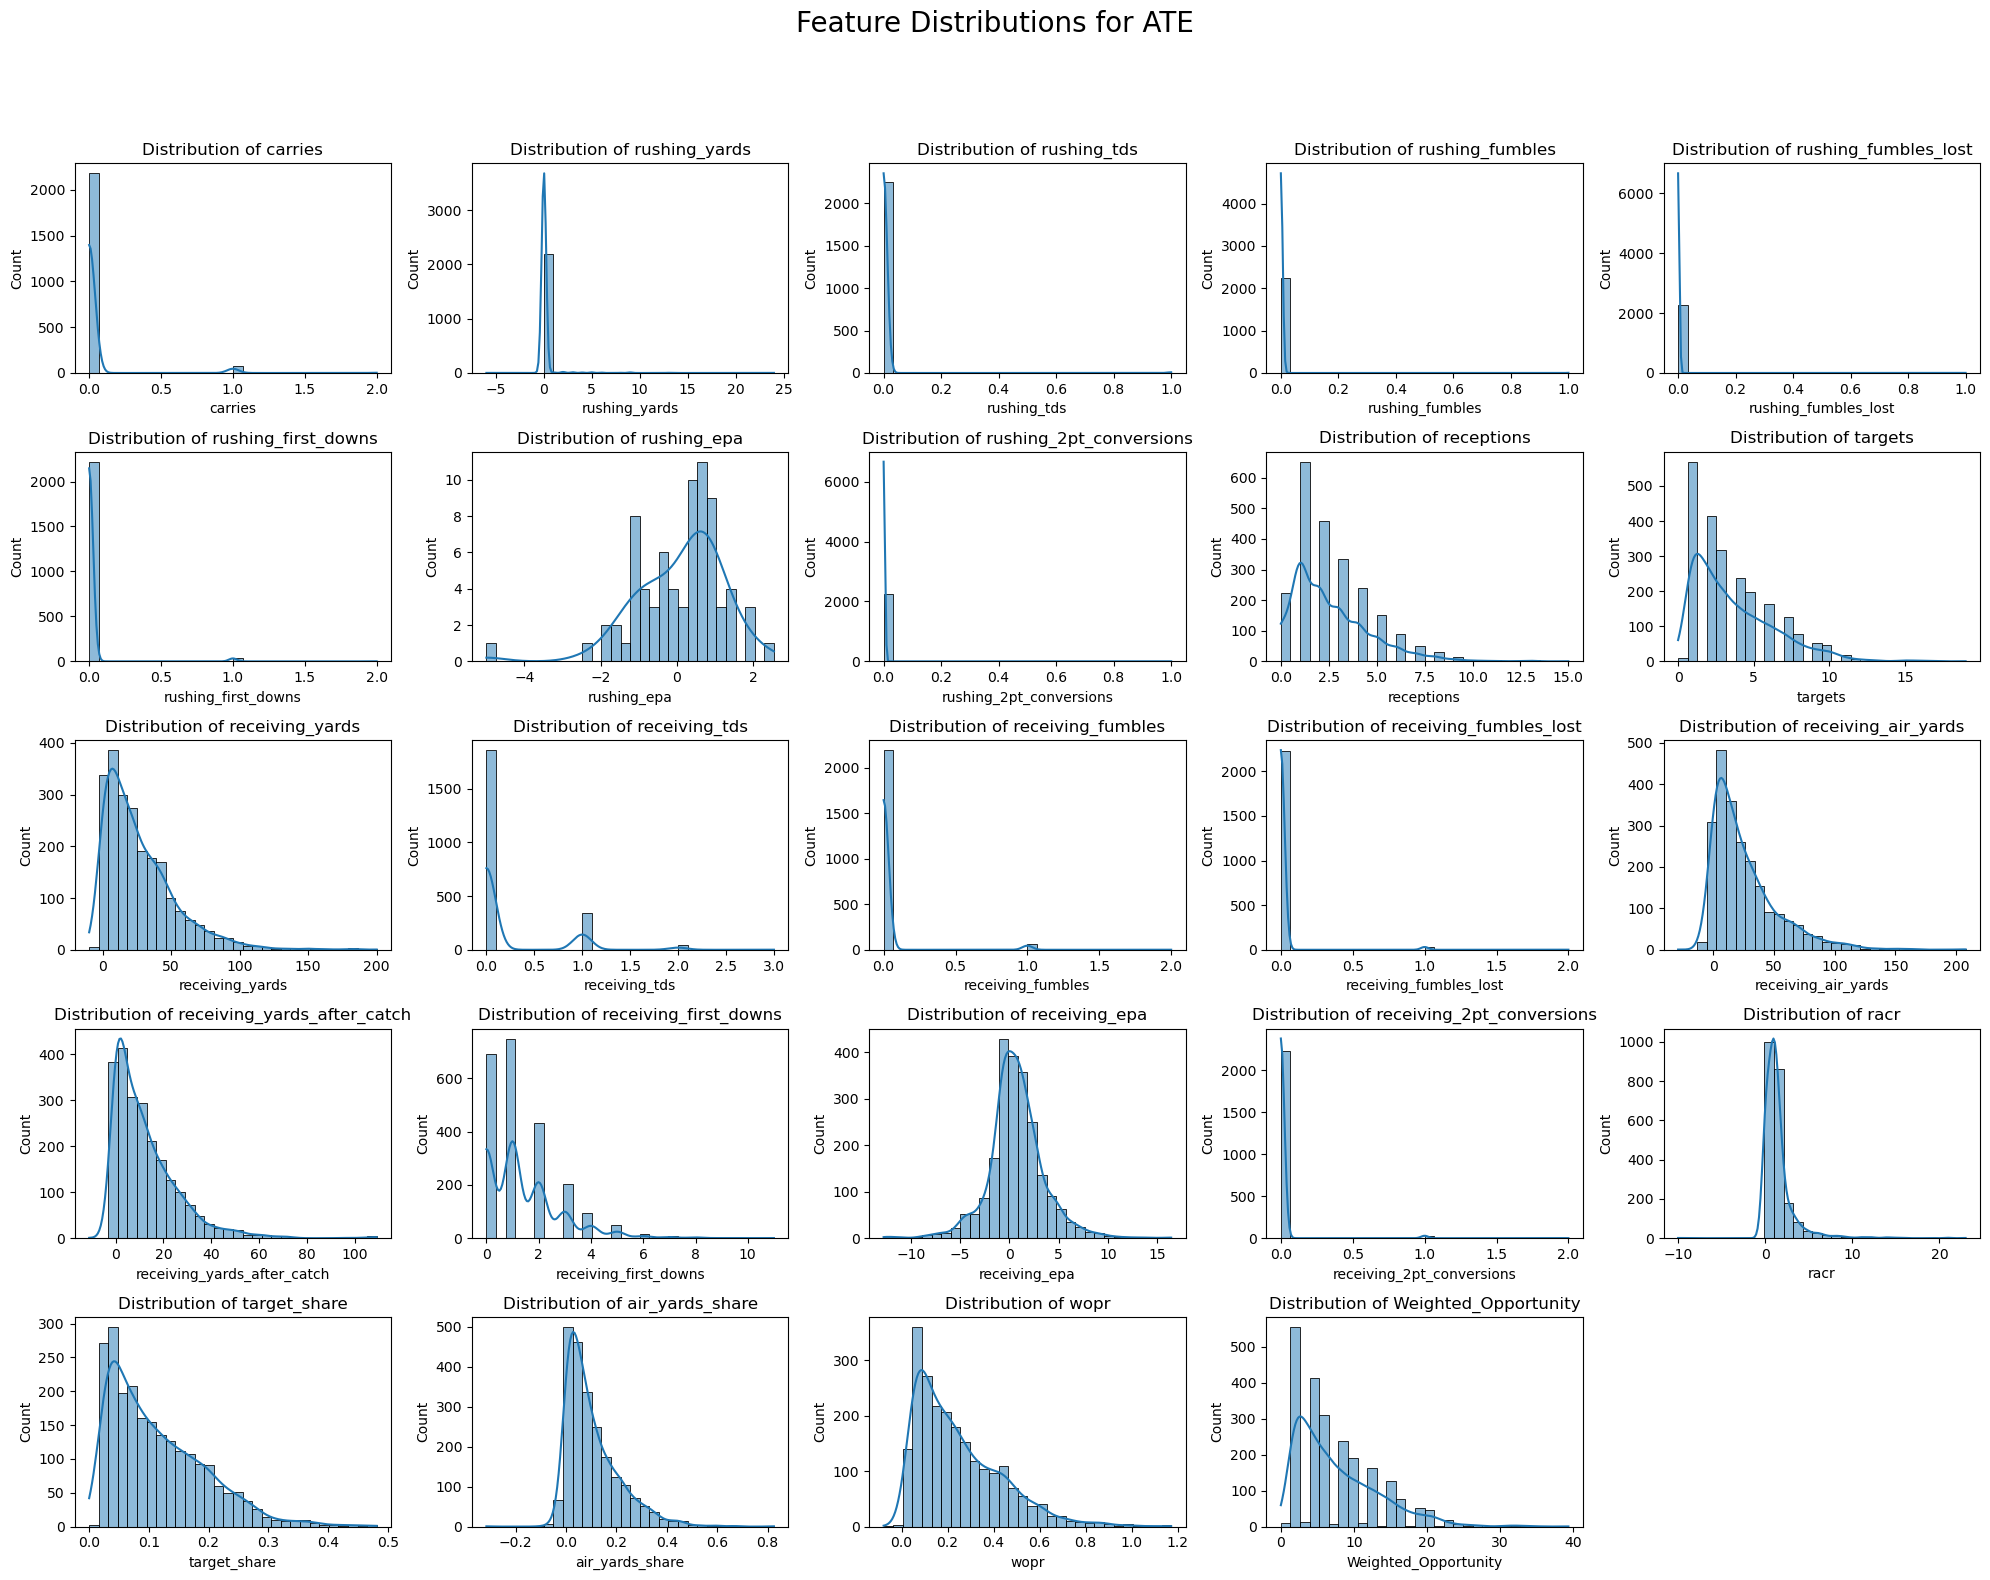

In [8]:
features_to_plot = [
    'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 
    'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 
    'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 
    'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 
    'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 
    'receiving_epa', 'receiving_2pt_conversions', 'racr', 'target_share', 
    'air_yards_share', 'wopr', 'Weighted_Opportunity'
]

# Dataframes dictionary
dfs = {'ARB': arb, 'AWR': awr, 'ATE': ate}

for name, df in dfs.items():

  plt.figure(figsize=(20, 15))
  plt.suptitle(f'Feature Distributions for {name}', fontsize=20, y=1.05)

  for i, feature in enumerate(features_to_plot, 1):

    plt.subplot(5, 5, i)
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

  plt.tight_layout()
  plt.show()

### ARB Dataset

Based on the plots:

- carries: Right skewed - Apply log transformation.
- rushing_yards: Right skewed - Apply log transformation.  
- rushing_tds: Right skewed - Apply log transformation.
- rushing_fumbles: Mostly zeros - Leave as is.
- rushing_fumbles_lost: Mostly zeros - Leave as is.
- rushing_first_downs: Right skewed - Apply log transformation.
- rushing_epa: Appears normally distributed - Leave as is.
- rushing_2pt_conversions: Mostly zeros - Leave as is.
- receptions: Right skewed - Apply log transformation.
- targets: Right skewed - Apply log transformation.
- receiving_yards: Right skewed - Apply log transformation.
- receiving_tds: Right skewed - Apply log transformation.  
- receiving_fumbles: Mostly zeros - Leave as is.
- receiving_fumbles_lost: Mostly zeros - Leave as is.
- receiving_air_yards: Right skewed - Apply log transformation.
- receiving_yards_after_catch: Right skewed - Apply log transformation.
- receiving_first_downs: Right skewed - Apply log transformation.  
- receiving_epa: Appears normally distributed - Leave as is.
- receiving_2pt_conversions: Mostly zeros - Leave as is.
- racr: Appears normally distributed - Leave as is.
- target_share: Appears normally distributed - Leave as is.
- air_ards_share: Right skewed - Apply log transformation.  
- wopr: Appears normally distributed - Leave as is.
- Weighted_Opportunity: Right skewed - Apply log transformation.

### AWR Dataset

Based on the plots:

- carries: Mostly zeros, no transformation needed.  
- rushing_yards: Mostly zeros, no transformation needed.
- rushing_tds: Mostly zeros, no transformation needed.
- rushing_fumbles: Mostly zeros, no transformation needed.
- rushing_fumbles_lost: Mostly zeros, no transformation needed.
- rushing_first_downs: Mostly zeros, no transformation needed.
- rushing_epa: Mostly zeros, no transformation needed.
- rushing_2pt_conversions: Mostly zeros, no transformation needed.
- receptions: Right skewed - Apply log transformation.
- targets: Right skewed - Apply log transformation.
- receiving_yards: Right skewed - Apply log transformation.
- receiving_tds: Right skewed - Apply square root transformation.
- receiving_fumbles: Mostly zeros, no transformation needed.
- receiving_fumbles_lost: Mostly zeros, no transformation needed.  
- receiving_air_yards: Right skewed - Apply log transformation.
- receiving_yards_after_catch: Right skewed - Apply log transformation. 
- receiving_first_downs: Right skewed - Apply log transformation.
- receiving_epa: Appears normally distributed - Leave as is.
- receiving_2pt_conversions: Mostly zeros, no transformation needed.
- racr: Appears normally distributed - Leave as is.
- target_share: Appears normally distributed - Leave as is.
- air_yards_share: Right skewed - Apply lo-ransformation.
- wopr: Appears normally distributed - Leave as is.
- Weighted_Opportunity: Right skewed - Apply log transformation.

### ATE Dataset  

Based on the plots:

- targets: Right skewed - Apply log transformation.  
- receptions: Right skewed - Apply log transformation.
- receiving_yards: Right skewed - Apply log transformation.
- receiving_tds: Right skewed - Apply square root transformation.
- racr: Appears normally distributed - Leave as is.
- target_share: Apskewed ormally distributed - Leave as is.
- air_yards_share: Right skee - Apply log transformation.
- wopr: Appears normally distributed - Leave as







 is.
- Weighted_Opportunity: Right skewed - Apply log transformation.ht skewed - Apply log transformation.
 Apply log transformation.d.

In [9]:
def count_nan_values(df, df_name):
    nan_counts = df.isnull().sum()
    print(f"NaN counts in {df_name} dataset:")
    print(nan_counts[nan_counts > 0])  # Print columns with NaN values only
    print("\n" + "-"*50 + "\n")

# Counting NaN values in each dataset
count_nan_values(arb, "ARB")
count_nan_values(awr, "AWR")
count_nan_values(ate, "ATE")

NaN counts in ARB dataset:
passing_epa        2746
pacr               2747
dakota             2756
rushing_epa         143
receiving_epa       558
racr                560
target_share        558
air_yards_share     558
wopr                558
dtype: int64

--------------------------------------------------

NaN counts in AWR dataset:
passing_epa        4855
pacr               4862
dakota             4918
rushing_epa        4080
receiving_epa        75
racr                 75
target_share         75
air_yards_share      75
wopr                 75
dtype: int64

--------------------------------------------------

NaN counts in ATE dataset:
passing_epa        2252
pacr               2253
dakota             2255
rushing_epa        2179
receiving_epa         9
racr                  9
target_share          9
air_yards_share       9
wopr                  9
dtype: int64

--------------------------------------------------



In [10]:
# Columns to be dropped
columns_to_drop = ['rushing_epa', 'racr', 'wopr','passing_epa', 'pacr', 'dakota']

# For AWR and ATE, drop 'rushing_epa', 'racr', and 'wopr' if they exist in the DataFrame
awr = awr.drop(columns=[col for col in columns_to_drop if col in awr.columns])
ate = ate.drop(columns=[col for col in columns_to_drop if col in ate.columns])

# For ARB, remove rows with multiple NaNs and fill the rest with 0
nan_counts_arb = arb[['rushing_epa', 'receiving_epa', 'racr', 'target_share', 'air_yards_share', 'wopr']].isna().sum(axis=1)
arb = arb[nan_counts_arb < 2]  # Adjust the threshold as needed
arb = arb.fillna(0)


nan_columns_awr = ['receiving_epa', 'racr', 'target_share', 'air_yards_share', 'wopr']
nan_columns_ate = ['receiving_epa', 'racr', 'target_share', 'air_yards_share', 'wopr']

# Filling NaN values with mean in AWR dataset for specific columns
for col in nan_columns_awr:
    if col in awr.columns:
        mean_value = awr[col].mean()
        awr[col].fillna(value=mean_value, inplace=True)

# Filling NaN values with mean in ATE dataset for specific columns
for col in nan_columns_ate:
    if col in ate.columns:
        mean_value = ate[col].mean()
        ate[col].fillna(value=mean_value, inplace=True)
count_nan_values(arb, "ARB")



count_nan_values(awr, "AWR")
count_nan_values(ate, "ATE")

NaN counts in ARB dataset:
Series([], dtype: int64)

--------------------------------------------------

NaN counts in AWR dataset:
Series([], dtype: int64)

--------------------------------------------------

NaN counts in ATE dataset:
Series([], dtype: int64)

--------------------------------------------------



In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np


# Adding a small constant to prevent log of negative values
epsilon = 1e-10

# Applying transformations to ARB dataset
arb_transformed = arb.copy()
features_to_log_transform_arb = [
    'carries', 'rushing_yards', 'rushing_tds', 'rushing_first_downs', 
    'receptions', 'targets', 'receiving_yards', 'receiving_tds', 
    'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 
    'air_yards_share', 'Weighted_Opportunity'
]

for feature in features_to_log_transform_arb:
    arb_transformed[feature] = arb_transformed[feature].clip(lower=0)  # Ensure all values are non-negative
    arb_transformed[feature] = np.log1p(arb_transformed[feature] + epsilon)

# Applying transformations to AWR dataset
awr_transformed = awr.copy()
features_to_log_transform_awr = [
    'receptions', 'targets', 'receiving_yards', 'receiving_air_yards', 
    'receiving_yards_after_catch', 'receiving_first_downs', 'air_yards_share', 
    'Weighted_Opportunity'
]

for feature in features_to_log_transform_awr:
    awr_transformed[feature] = awr_transformed[feature].clip(lower=0)  # Ensure all values are non-negative
    awr_transformed[feature] = np.log1p(awr_transformed[feature] + epsilon)

awr_transformed['receiving_tds'] = np.sqrt(awr_transformed['receiving_tds'].clip(lower=0))  # Ensure all values are non-negative

# Applying transformations to ATE dataset
ate_transformed = ate.copy()
features_to_log_transform_ate = [
    'targets', 'receptions', 'receiving_yards', 'air_yards_share'
]

for feature in features_to_log_transform_ate:
    ate_transformed[feature] = ate_transformed[feature].clip(lower=0)  # Ensure all values are non-negative
    ate_transformed[feature] = np.log1p(ate_transformed[feature] + epsilon)

ate_transformed['receiving_tds'] = np.sqrt(ate_transformed['receiving_tds'].clip(lower=0))  # Ensure all values are non-negative

# Standardizing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

arb_standardized = pd.DataFrame(scaler.fit_transform(arb_transformed.select_dtypes(include=[np.number])), 
                                columns=arb_transformed.select_dtypes(include=[np.number]).columns)

awr_standardized = pd.DataFrame(scaler.fit_transform(awr_transformed.select_dtypes(include=[np.number])), 
                                columns=awr_transformed.select_dtypes(include=[np.number]).columns)

ate_standardized = pd.DataFrame(scaler.fit_transform(ate_transformed.select_dtypes(include=[np.number])), 
                                columns=ate_transformed.select_dtypes(include=[np.number]).columns)

count_nan_values(arb_standardized, "ARB")



count_nan_values(awr_standardized, "AWR")
count_nan_values(ate_standardized, "ATE")

NaN counts in ARB dataset:
Series([], dtype: int64)

--------------------------------------------------

NaN counts in AWR dataset:
Series([], dtype: int64)

--------------------------------------------------

NaN counts in ATE dataset:
Series([], dtype: int64)

--------------------------------------------------



In [12]:
from sklearn.model_selection import train_test_split

# Function to split the dataset
def split_data(df, target):
    non_numeric_columns = ['player_name', 'team', 'week', 'season', 'opponent_team']
    drop_columns = [col for col in non_numeric_columns if col in df.columns] + [target]
    X = df.drop(columns=drop_columns)  # Dropping non-numeric and target columns only if they exist
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing
    return X_train, X_test, y_train, y_test

# Splitting ARB dataset
arb_X_train_PPR, arb_X_test_PPR, arb_y_train_PPR, arb_y_test_PPR = split_data(arb_standardized, 'PPR_FP')
arb_X_train_Half_PPR, arb_X_test_Half_PPR, arb_y_train_Half_PPR, arb_y_test_Half_PPR = split_data(arb_standardized, 'Half_PPR_FP')

# Splitting AWR dataset
awr_X_train_PPR, awr_X_test_PPR, awr_y_train_PPR, awr_y_test_PPR = split_data(awr_standardized, 'PPR_FP')
awr_X_train_Half_PPR, awr_X_test_Half_PPR, awr_y_train_Half_PPR, awr_y_test_Half_PPR = split_data(awr_standardized, 'Half_PPR_FP')

# Splitting ATE dataset
ate_X_train_TE_Premium, ate_X_test_TE_Premium, ate_y_train_TE_Premium, ate_y_test_TE_Premium = split_data(ate_standardized, 'TE_Premium_FP')





# Modeling

We will explore three types of machine learning models - Lasso Regression, Random Forest, and Gradient Boosting - for each of the three target variables - PPR_FP, Half_PPR_FP, and TE_Premium_FP for ARB, AWR, and ATE datasets, respectively.
This results in a total of 9 machine learning models being trained and evaluated (3 target variables * 3 model types = 9).
To optimize the performance of these models, we'll employ GridSearchCV to tune the hyperparameters, ensuring the models are neither overfitting nor underfitting.
The selection of hyperparameters will be based on cross-validation results. We'll use a five-fold cross-validation for Lasso to get reliable performance estimates and mitigate the computational load. For Random Forest and Gradient Boosting models, a three-fold cross-validation approach will be adopted.
The best performing model for each target variable will be identified based on the cross-validation results and will be used for predictions.

In [13]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Lasso Regression parameters
lasso_params = {'alpha': np.logspace(-6, 6, 13)}

# Random Forest parameters
rf_params = {
    'bootstrap': [True],
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features':  ['sqrt', 'log2']
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Datasets and target variables
datasets = {
    'ARB_PPR': (arb_X_train_PPR, arb_y_train_PPR),
    'ARB_Half_PPR': (arb_X_train_Half_PPR, arb_y_train_Half_PPR),
    'AWR_PPR': (awr_X_train_PPR, awr_y_train_PPR),
    'AWR_Half_PPR': (awr_X_train_Half_PPR, awr_y_train_Half_PPR),
    'ATE_TE_Premium': (ate_X_train_TE_Premium, ate_y_train_TE_Premium)
}

results = {}

# Training models
for name, (X, y) in datasets.items():
    print(f"Training models for {name}")
    
    # Lasso Regression
    lasso = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring=["r2", "neg_mean_absolute_error"], refit='r2')
    lasso.fit(X, y)
    
    # Random Forest
    rf = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring=["r2", "neg_mean_absolute_error"], refit='r2')
    rf.fit(X, y)
    
    # Gradient Boosting
    gb = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring=["r2", "neg_mean_absolute_error"], refit='r2')
    gb.fit(X, y)
    
    # Store the results
    results[name] = {
        'Lasso': {
            'R2': lasso.best_score_,
            'MAE': -lasso.cv_results_['mean_test_neg_mean_absolute_error'][lasso.best_index_],
            'Best Params': lasso.best_params_
        },
        'Random Forest': {
            'R2': rf.best_score_,
            'MAE': -rf.cv_results_['mean_test_neg_mean_absolute_error'][rf.best_index_],
            'Best Params': rf.best_params_
        },
        'Gradient Boosting': {
            'R2': gb.best_score_,
            'MAE': -gb.cv_results_['mean_test_neg_mean_absolute_error'][gb.best_index_],
            'Best Params': gb.best_params_
        }
    }

# Print results
for dataset, metrics in results.items():
    print(f"\nResults for {dataset}:")
    for model, model_metrics in metrics.items():
        print(f"{model} - R2: {model_metrics['R2']}, MAE: {model_metrics['MAE']}, Best Params: {model_metrics['Best Params']}")


Training models for ARB_PPR
Training models for ARB_Half_PPR
Training models for AWR_PPR
Training models for AWR_Half_PPR
Training models for ATE_TE_Premium

Results for ARB_PPR:
Lasso - R2: 0.9999973967852614, MAE: 0.0010456772347546257, Best Params: {'alpha': 0.001}
Random Forest - R2: 0.9920395565885644, MAE: 0.03815592799248727, Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Gradient Boosting - R2: 0.9989194037781731, MAE: 0.005472729824656167, Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}

Results for ARB_Half_PPR:
Lasso - R2: 0.9999320037924155, MAE: 0.0019685787092048697, Best Params: {'alpha': 0.001}
Random Forest - R2: 0.9917194662930975, MAE: 0.037900375249835055, Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Gradient Boosting - R2: 0.9981615621462898, MAE: 0.018174772042881544, Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

Re

In [14]:
results[name] = {
    'Lasso': {
        'R2': lasso.best_score_, 
        'MAE': -lasso.cv_results_['mean_test_neg_mean_absolute_error'][lasso.best_index_], 
        'Best Params': lasso.best_params_,
        'Model': lasso.best_estimator_  # Storing the trained model
    },
    'Random Forest': {
        'R2': rf.best_score_, 
        'MAE': -rf.cv_results_['mean_test_neg_mean_absolute_error'][rf.best_index_], 
        'Best Params': rf.best_params_,
        'Model': rf.best_estimator_  # Storing the trained model
    },
    'Gradient Boosting': {
        'R2': gb.best_score_, 
        'MAE': -gb.cv_results_['mean_test_neg_mean_absolute_error'][gb.best_index_], 
        'Best Params': gb.best_params_,
        'Model': gb.best_estimator_  # Storing the trained model
    }
}

results[name]


{'Lasso': {'R2': 0.9998673237526617,
  'MAE': 0.0008958929557806826,
  'Best Params': {'alpha': 0.0001},
  'Model': Lasso(alpha=0.0001, max_iter=10000)},
 'Random Forest': {'R2': 0.9949670417546844,
  'MAE': 0.02684295713466144,
  'Best Params': {'bootstrap': True,
   'max_depth': 20,
   'max_features': 'sqrt',
   'n_estimators': 150},
  'Model': RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=150)},
 'Gradient Boosting': {'R2': 0.9980626015991515,
  'MAE': 0.011492977060408676,
  'Best Params': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150},
  'Model': GradientBoostingRegressor(max_depth=4, n_estimators=150)}}

In This notebook we trained 9 different models. The lasso regression I suspect is a victim of overfitting however the other two types of models are very promising as prediction models. if you notice. I did a lot of data formatting and pre-processing. I have a separate notebook for our data collection and formatting. I ended up not being able to incorporate the defensive and offensive team stats but I may in the future with a more sophiscated model or models. This project took me a while so I hope the user can enjoy. If you want to use the models for your own predictions or implenmentation be my guest. 

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Test datasets with X_train, y_train 
test_datasets = {
  'ARB_PPR': (arb_X_train_PPR, arb_y_train_PPR, arb_X_test_PPR, arb_y_test_PPR),
  'ARB_Half_PPR': (arb_X_train_Half_PPR, arb_y_train_Half_PPR, arb_X_test_Half_PPR, arb_y_test_Half_PPR),
  'AWR_PPR': (awr_X_train_PPR, awr_y_train_PPR, awr_X_test_PPR, awr_y_test_PPR),
  'AWR_Half_PPR': (awr_X_train_Half_PPR, awr_y_train_Half_PPR, awr_X_test_Half_PPR, awr_y_test_Half_PPR),
  'ATE_TE_Premium': (ate_X_train_TE_Premium, ate_y_train_TE_Premium, ate_X_test_TE_Premium, ate_y_test_TE_Premium)
}

test_results = {}

# Evaluate models
for name, (X_train, y_train, X_test, y_test) in test_datasets.items():

  print(f"Evaluating {name}")
  
  # Get numeric columns 
  numeric_cols = X_test.select_dtypes(include=[np.number]).columns
  
  # Lasso
  lasso = results[name]['Lasso']['Best Params']
  lasso_model = Lasso(**lasso)

  # Fit on full X_train
  lasso_model.fit(X_train, y_train)  

  # Predict on numeric columns 
  lasso_pred = lasso_model.predict(X_test[numeric_cols])

  lasso_r2 = r2_score(y_test, lasso_pred)
  lasso_mae = mean_absolute_error(y_test, lasso_pred)

  # Random Forest
  rf = results[name]['Random Forest']['Best Params']
  rf_model = RandomForestRegressor(**rf)

  rf_model.fit(X_train, y_train)

  rf_pred = rf_model.predict(X_test[numeric_cols])

  rf_r2 = r2_score(y_test, rf_pred)
  rf_mae = mean_absolute_error(y_test, rf_pred)

  # Gradient Boosting
  gb = results[name]['Gradient Boosting']['Best Params']
  gb_model = GradientBoostingRegressor(**gb)

  gb_model.fit(X_train, y_train)

  gb_pred = gb_model.predict(X_test[numeric_cols])

  gb_r2 = r2_score(y_test, gb_pred)
  gb_mae = mean_absolute_error(y_test, gb_pred)

  # Store results
  test_results[name] = {
    'Lasso': {'R2': lasso_r2, 'MAE': lasso_mae},
    'Random Forest': {'R2': rf_r2, 'MAE': rf_mae},
    'Gradient Boosting': {'R2': gb_r2, 'MAE': gb_mae}
  }

# Print results
for name, results in test_results.items():
  print(f"\n{name} Test Results")
  print(results)

Evaluating ARB_PPR


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.782e-01, tolerance: 1.785e-01
  model = cd_fast.enet_coordinate_descent(


Evaluating ARB_Half_PPR
Evaluating AWR_PPR


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.846e-01, tolerance: 3.959e-01
  model = cd_fast.enet_coordinate_descent(


Evaluating AWR_Half_PPR
Evaluating ATE_TE_Premium


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.918e-01, tolerance: 1.787e-01
  model = cd_fast.enet_coordinate_descent(



ARB_PPR Test Results
{'Lasso': {'R2': 0.9999008744432731, 'MAE': 0.0026019409731007025}, 'Random Forest': {'R2': 0.9968929381549017, 'MAE': 0.03198570727568829}, 'Gradient Boosting': {'R2': 0.9997936547298123, 'MAE': 0.003935929720800204}}

ARB_Half_PPR Test Results
{'Lasso': {'R2': 0.9998846347907918, 'MAE': 0.0025403839531172494}, 'Random Forest': {'R2': 0.9959649726478554, 'MAE': 0.03188575481306433}, 'Gradient Boosting': {'R2': 0.9989236068927976, 'MAE': 0.01677437397145773}}

AWR_PPR Test Results
{'Lasso': {'R2': 0.9999844728000058, 'MAE': 0.0019703114040633563}, 'Random Forest': {'R2': 0.9989364855250993, 'MAE': 0.01424348615744619}, 'Gradient Boosting': {'R2': 0.9999224173490402, 'MAE': 0.002609474917502107}}

AWR_Half_PPR Test Results
{'Lasso': {'R2': 0.9999864806449559, 'MAE': 0.0016073349573979697}, 'Random Forest': {'R2': 0.9989152089587672, 'MAE': 0.0154847959838993}, 'Gradient Boosting': {'R2': 0.999600401018248, 'MAE': 0.009791506038745533}}

ATE_TE_Premium Test Results


# CONCLUSION